# Определение перспективного тарифа для телеком компании

Вы аналитик компании «Мегалайн» — федерального оператора сотовой связи. Клиентам предлагают два тарифных плана: «Смарт» и «Ультра». Чтобы скорректировать рекламный бюджет, коммерческий департамент хочет понять, какой тариф приносит больше денег.

Вам предстоит сделать предварительный анализ тарифов на небольшой выборке клиентов. В вашем распоряжении данные 500 пользователей «Мегалайна»: кто они, откуда, каким тарифом пользуются, сколько звонков и сообщений каждый отправил за 2018 год. Нужно проанализировать поведение клиентов и сделать вывод — какой тариф лучше.

## Описание тарифов 

#### Тариф «Смарт»
1. Ежемесячная плата: 550 рублей
2. Включено 500 минут разговора, 50 сообщений и 15 Гб интернет-трафика
3. Стоимость услуг сверх тарифного пакета:
    - минута разговора: 3 рубля
    - сообщение: 3 рубля
    - 1 Гб интернет-трафика: 200 рублей
    
####  Тариф «Ультра»
1. Ежемесячная плата: 1950 рублей
2. Включено 3000 минут разговора, 1000 сообщений и 30 Гб интернет-трафика
3. Стоимость услуг сверх тарифного пакета:
    - минута разговора: 1 рубль
    - сообщение: 1 рубль
    - 1 Гб интернет-трафика: 150 рублей
    
    
**Важно:** «Мегалайн» всегда округляет вверх значения минут и мегабайтов. Если пользователь проговорил всего 1 секунду, в тарифе засчитывается целая минута.


## Описание данных: 

**Таблица users (информация о пользователях):**
- user_id — уникальный идентификатор пользователя
- first_name — имя пользователя
- last_name — фамилия пользователя
- age — возраст пользователя (годы)
- reg_date — дата подключения тарифа (день, месяц, год)
- churn_date — дата прекращения пользования тарифом (если значение пропущено, то тариф ещё действовал на момент выгрузки данных)
- city — город проживания пользователя
- tariff — название тарифного плана

**Таблица calls (информация о звонках):**
- id — уникальный номер звонка
- call_date — дата звонка
- duration — длительность звонка в минутах
- user_id — идентификатор пользователя, сделавшего звонок

**Таблица messages (информация о сообщениях):**
- id — уникальный номер сообщения
- message_date — дата сообщения
- user_id — идентификатор пользователя, отправившего сообщение

**Таблица internet (информация об интернет-сессиях):**
- id — уникальный номер сессии
- mb_used — объём потраченного за сессию интернет-трафика (в мегабайтах)
- session_date — дата интернет-сессии
- user_id — идентификатор пользователя

**Таблица tariffs (информация о тарифах):**
- tariff_name — название тарифа
- rub_monthly_fee — ежемесячная абонентская плата в рублях
- minutes_included — количество минут разговора в месяц, включённых в абонентскую плату
- messages_included — количество сообщений в месяц, включённых в абонентскую плату
- mb_per_month_included — объём интернет-трафика, включённого в абонентскую плату (в мегабайтах)
- rub_per_minute — стоимость минуты разговора сверх тарифного пакета (например, если в тарифе 100 минут разговора в месяц, то со 101 минуты будет взиматься плата)
- rub_per_message — стоимость отправки сообщения сверх тарифного пакета
- rub_per_gb — стоимость дополнительного гигабайта интернет-трафика сверх тарифного пакета (1 гигабайт = 1024 мегабайта)

## План работы: 

Шаг 1. Изучение общей информации о файле 

Шаг 2. Подготовка данных: 
    1. удаление дубликатов, заполнение пропусков, приведение данных к корректному типу, где это необходимо, удаление прочих ошибок
    2. посчитать для каждого пользователя:
        - количество сделанных звонков и израсходованных минут разговора по месяцам;
        - количество отправленных сообщений по месяцам;
        - объем израсходованного интернет-трафика по месяцам;
        - помесячную выручку с каждого пользователя (вычтите бесплатный лимит из суммарного количества звонков, сообщений и интернет-трафика; остаток умножьте на значение из тарифного плана; прибавьте абонентскую плату, соответствующую тарифному плану).

Шаг 3. Анализ поведения клиентов

Шаг 4. Проверка гипотез 

###  Шаг 1. Откройте файл с данными и изучите общую информацию

In [1]:
#импортируем нужные библиотеки
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats as st

#### 1.1 считываем файлы и выведем по ним информацию 

In [2]:
#считываем файлы и выведем по ним информацию 

calls = pd.read_csv('/datasets/calls.csv')
calls.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202607 entries, 0 to 202606
Data columns (total 4 columns):
id           202607 non-null object
call_date    202607 non-null object
duration     202607 non-null float64
user_id      202607 non-null int64
dtypes: float64(1), int64(1), object(2)
memory usage: 6.2+ MB


In [3]:
internet = pd.read_csv('/datasets/internet.csv', index_col=0)
internet.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 149396 entries, 0 to 149395
Data columns (total 4 columns):
id              149396 non-null object
mb_used         149396 non-null float64
session_date    149396 non-null object
user_id         149396 non-null int64
dtypes: float64(1), int64(1), object(2)
memory usage: 5.7+ MB


In [4]:
messages = pd.read_csv('/datasets/messages.csv')
messages.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123036 entries, 0 to 123035
Data columns (total 3 columns):
id              123036 non-null object
message_date    123036 non-null object
user_id         123036 non-null int64
dtypes: int64(1), object(2)
memory usage: 2.8+ MB


In [5]:
tariffs = pd.read_csv('/datasets/tariffs.csv')
tariffs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 8 columns):
messages_included        2 non-null int64
mb_per_month_included    2 non-null int64
minutes_included         2 non-null int64
rub_monthly_fee          2 non-null int64
rub_per_gb               2 non-null int64
rub_per_message          2 non-null int64
rub_per_minute           2 non-null int64
tariff_name              2 non-null object
dtypes: int64(7), object(1)
memory usage: 256.0+ bytes


In [6]:
users = pd.read_csv('/datasets/users.csv')
users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
user_id       500 non-null int64
age           500 non-null int64
churn_date    38 non-null object
city          500 non-null object
first_name    500 non-null object
last_name     500 non-null object
reg_date      500 non-null object
tariff        500 non-null object
dtypes: int64(2), object(6)
memory usage: 31.4+ KB


### Вывод
Данные содержат информацию по 500 клиентам. 

Для дальнейшей работы необходимо:
1. заменить тип данных у столбцов с датой и временем
2. обработать звонки с нулевой длительностью
3. округлить значения минут разговора и мегабайт использованного трафика в большую сторону, так как тарифы считаются по минутам и мегабайтам.


###  Шаг 2. Подготовка данных

#### 2.1 Заменим тип данных и исправим ошибки

**Замена данных с датой и временем со строчного на временной:**

In [7]:
calls['call_date'] = pd.to_datetime(calls['call_date'], format='%Y-%m-%d')
internet['session_date'] = pd.to_datetime(internet['session_date'], format='%Y-%m-%d')
messages['message_date'] = pd.to_datetime(messages['message_date'], format='%Y-%m-%d')
users['churn_date'] = pd.to_datetime(users['churn_date'], format='%Y-%m-%d')
users['reg_date'] = pd.to_datetime(users['reg_date'], format='%Y-%m-%d')

**Обработаем звонки с нулевой длительностью**

In [8]:
print('Доля звонков с нулевой длительностью:{:.2%}'.format(
    len(calls.loc[calls['duration'] == 0])/len(calls)))

Доля звонков с нулевой длительностью:19.55%


Text(0.5, 1.0, 'Зависимость количества нулевых значений от общего числа звонков по месяцам')

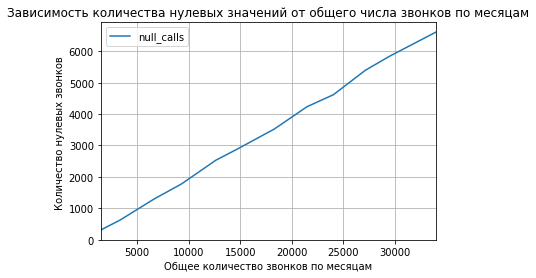

In [9]:
# добавим столбец со значением месяца
calls['month'] = calls['call_date'].dt.month

# построим график зависимости количества нулевых значений от общего числа звонков за каждый месяц
calls.loc[calls['duration'] == 0, 'null_calls'] = 1
calls.pivot_table(index='month', values=['id', 'null_calls'], aggfunc='count').plot(
    x='id', y='null_calls',
    grid=True)
plt.xlabel('Общее количество звонков по месяцам')
plt.ylabel('Количество нулевых звонков ')
plt.title('Зависимость количества нулевых значений от общего числа звонков по месяцам')

По графику видно, что чем больше общее количество звонков, тем больше звонков с нулевой длительностью. 
Это могут быть пропущенные звонки, но мы не можем точно это утверждать, так как у нас нет признака, описывающего входящие/исходящие вызовы. Еще это могут быть сброшенные звонки, звонки от мошенников, звонки не тому абоненту, случайный набор номера.
Поэтому округлим все значения в большую сторону (тариф считается по минутам), а нулевые значения заменим на 1.

In [10]:
calls['duration'] = calls['duration'].apply(np.ceil)
calls.loc[calls['duration'] == 0, 'duration'] = 1

In [11]:
calls.head()

,id,call_date,duration,user_id,month,null_calls
0,1000_0,2018-07-25,1.0,1000,7,1.0
1,1000_1,2018-08-17,1.0,1000,8,1.0
2,1000_2,2018-06-11,3.0,1000,6,NaN
3,1000_3,2018-09-21,14.0,1000,9,NaN
4,1000_4,2018-12-15,6.0,1000,12,NaN


**Обработаем интернет трафик**

In [12]:
print('Доля нулевого трафика:{:.2%}'.format(
    len(internet.loc[internet['mb_used'] == 0])/len(internet)))

Доля нулевого трафика:13.12%


Text(0.5, 1.0, 'Зависимость количества нулевых сессий от общего числа интернет-сессий по месяцам')

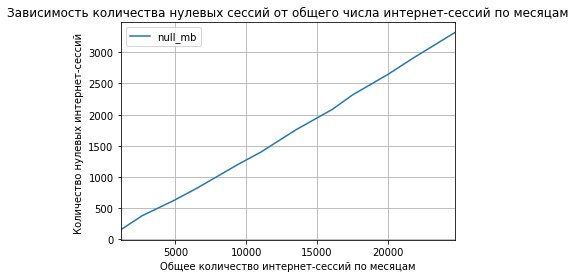

In [13]:
# добавим столбец со значением месяца
internet['month'] = internet['session_date'].dt.month

# построим график зависимости количества нулевых значений от общего числа звонков за каждый месяц
internet.loc[internet['mb_used'] == 0, 'null_mb'] = 1
internet.pivot_table(index='month', values=['id', 'null_mb'], aggfunc='count').plot(
    x='id', y='null_mb',
    grid=True)
plt.xlabel('Общее количество интернет-сессий по месяцам')
plt.ylabel('Количество нулевых интернет-сессий ')
plt.title('Зависимость количества нулевых сессий от общего числа интернет-сессий по месяцам')

По графику видно, что зависимость нулевых сессий от их общего количества аналогична зависимости по звонкам. 
Поэтому также округлим все значения в большую сторону (тариф считается по мегабайтам), а нулевые значения заменим на 1.

In [14]:
internet['mb_used'] = internet['mb_used'].apply(np.ceil)
internet.loc[internet['mb_used'] == 0, 'mb_used'] = 1

In [15]:
internet.head()

,id,mb_used,session_date,user_id,month,null_mb
0,1000_0,113.0,2018-11-25,1000,11,NaN
1,1000_1,1053.0,2018-09-07,1000,9,NaN
2,1000_2,1198.0,2018-06-25,1000,6,NaN
3,1000_3,551.0,2018-08-22,1000,8,NaN
4,1000_4,303.0,2018-09-24,1000,9,NaN


#### 2.2 Расчет данных по каждому пользователю

**Количество сделанных звонков и израсходованных минут разговора по месяцам**

In [16]:
users_calls = calls.merge(users, on='user_id')

calls_grouped = users_calls.pivot_table(index=['user_id', 'month'], values=[ 'duration'], 
                       aggfunc=['count','sum'])
calls_grouped.columns = ['calls', 'duration']

calls_grouped = calls_grouped.reset_index()

**Количество отправленных сообщений по месяцам**

In [17]:
messages['month'] = messages['message_date'].dt.month
users_messages = messages.merge(users, on='user_id')
messages_grouped = users_messages.pivot_table(index=['user_id', 'month'], values=['id'], 
                       aggfunc='count')
messages_grouped.columns = ['messages']
messages_grouped = messages_grouped.reset_index()

**Объем израсходованного интернет-трафика по месяцам**

In [18]:
internet['month'] = internet['session_date'].dt.month
users_internet = internet.merge(users, on='user_id')
internet_grouped = users_internet.pivot_table(index=['user_id', 'month'], values=['mb_used'], 
                       aggfunc='sum')
internet_grouped.columns = ['mb_used']
internet_grouped = internet_grouped.reset_index()

In [19]:
internet_grouped.head()

,user_id,month,mb_used
0,1000,5,2257.0
1,1000,6,23262.0
2,1000,7,14017.0
3,1000,8,14072.0
4,1000,9,14583.0


In [20]:
#объединяем все сводные таблицы в одну: 

united_pivots = calls_grouped.merge(messages_grouped, on = ['user_id', 'month'], how='outer').merge(
    internet_grouped, on = ['user_id', 'month'], how='outer')

**Расчет помесячной выручки**

В таблице появились пропуски после объединения таблиц в тех категориях, которые абоненты не использовали, поэтому их будет логично заменить на 0.

In [21]:
# пропущенные значения заменяем на нули
united_pivots = united_pivots.fillna(0)

In [22]:
#добавляем тариф для каждого пользователя
united_data = united_pivots.merge(users[['user_id', 'tariff']], on = 'user_id')

In [23]:
united_data.head()

,user_id,month,calls,duration,messages,mb_used,tariff
0,1000,5,22.0,164.0,22.0,2257.0,ultra
1,1000,6,43.0,187.0,60.0,23262.0,ultra
2,1000,7,47.0,346.0,75.0,14017.0,ultra
3,1000,8,52.0,418.0,81.0,14072.0,ultra
4,1000,9,58.0,478.0,57.0,14583.0,ultra


In [24]:
tariffs.head()

,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,tariff_name
0,50,15360,500,550,200,3,3,smart
1,1000,30720,3000,1950,150,1,1,ultra


(вычтите бесплатный лимит из суммарного количества звонков, сообщений и интернет-трафика; 
остаток умножьте на значение из тарифного плана; 
прибавьте абонентскую плату, соответствующую тарифному плану).


In [25]:
#напишем функцию, которая считает выручку с каждого пользователя

def revenue(row):
    duration = row['duration']
    messages = row['messages']
    mb_used = row['mb_used']
    tariff = row['tariff']
    
    extra_duration = duration - tariffs.loc[0, 'minutes_included']
    extra_messages = messages - tariffs.loc[0, 'messages_included']
    extra_mb = mb_used - tariffs.loc[0, 'mb_per_month_included']
        
    if extra_duration < 0: extra_duration = 0
    if extra_mb < 0: extra_mb = 0
    if extra_messages < 0: extra_messages = 0
        
    if tariff == 'smart':
        return round(extra_messages * tariffs.loc[0, 'rub_per_message'] + 
                (np.ceil(extra_mb / 1024) * tariffs.loc[0, 'rub_per_gb'] ) + 
                extra_duration * tariffs.loc[0, 'rub_per_minute'] + 
                tariffs.loc[0, 'rub_monthly_fee'], 2) 
    else:
        return round(extra_messages * tariffs.loc[1, 'rub_per_message'] + 
                (np.ceil(extra_mb / 1024) * tariffs.loc[1, 'rub_per_gb'] ) + 
                extra_duration * tariffs.loc[1, 'rub_per_minute'] + 
                tariffs.loc[1, 'rub_monthly_fee'], 2) 

In [26]:
united_data['revenue'] = united_data.apply(revenue, axis=1)
united_data.head(10)

,user_id,month,calls,duration,messages,mb_used,tariff,revenue
0,1000,5,22.0,164.0,22.0,2257.0,ultra,1950.0
1,1000,6,43.0,187.0,60.0,23262.0,ultra,3160.0
2,1000,7,47.0,346.0,75.0,14017.0,ultra,1975.0
3,1000,8,52.0,418.0,81.0,14072.0,ultra,1981.0
4,1000,9,58.0,478.0,57.0,14583.0,ultra,1957.0
5,1000,10,57.0,363.0,73.0,14717.0,ultra,1973.0
6,1000,11,43.0,344.0,58.0,14769.0,ultra,1958.0
7,1000,12,46.0,341.0,70.0,9829.0,ultra,1970.0
8,1001,11,59.0,444.0,0.0,18460.0,smart,1350.0
9,1001,12,63.0,430.0,0.0,14059.0,smart,550.0


### Вывод

Заменили данные  с датой и временем со строчного на временной

Выделили долю звонков с нулевой длительностью - 19.55%. 

Выделили долю трафика объемом 0 МБ - 13.12%. 

Так же мы выяснили ,что то чем больше общее количество звонков и объем использованного трафика, тем больше звонков с нулевой длительностью и сессий объемом 0 МБ. Все значения мы округлили в большую сторону, а  а нулевые значения заменили на 1.

Кроме того, что каждого пользователя мы рассчитали:
* 		количество сделанных звонков и израсходованных минут разговора по месяцам;
* 		количество отправленных сообщений по месяцам;
* 		объем израсходованного интернет-трафика по месяцам;
* 		помесячную выручку с каждого пользователя





###  Шаг 3. Анализ поведения клиентов

**3.1 Посчитаем, сколько минут разговора, сколько сообщений и какой объём интернет-трафика требуется в среднем пользователям каждого тарифа в месяц**

In [27]:
#посчитаем медиану для каждого пользователя в месяц
medians = united_data.pivot_table(index='user_id', values=['duration', 'messages', 'mb_used'], aggfunc='median')

#добавляем тариф для каждого пользователя
medians = medians.merge(users[['user_id', 'tariff']], on = 'user_id')

medians.head()

,user_id,duration,mb_used,messages,tariff
0,1000,345.0,14327.5,65.0,ultra
1,1001,437.0,16259.5,0.0,smart
2,1002,221.0,17615.0,11.0,smart
3,1003,844.0,11369.0,83.0,ultra
4,1004,136.5,17831.0,154.5,ultra


In [28]:
#посчитаем медиану, дисперсию и стандартное отклонение для каждого тарифа

tariff_stat = medians.pivot_table(index='tariff', values=['duration', 'mb_used', 'messages'], 
                                  aggfunc={'duration': [np.median, np.var, np.std], 
                                            'mb_used': [np.median, np.var, np.std], 
                                            'messages': [np.median, np.var, np.std]})
tariff_stat

duration                             mb_used               \
         median         std           var    median          std   
tariff                                                             
smart     453.0  164.614327  27097.876586  16955.00  4181.498288   
ultra     550.5  311.491491  97026.949014  19751.75  8901.975727   

                     messages                          
                 var   median        std          var  
tariff                                                 
smart   1.748493e+07     28.5  28.010653   784.596662  
ultra   7.924517e+07     47.5  49.236809  2424.263318

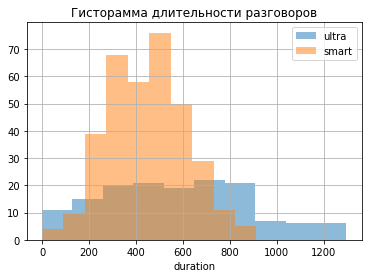

In [29]:
#построим гистограмму по длительности разговоров для тарифов
for tariff in ['ultra', 'smart']:
    medians[medians['tariff']==tariff ]['duration'].hist(alpha=0.5)
    plt.legend(['ultra', 'smart'])
    plt.title('Гисторамма длительности разговоров')
    plt.xlabel('duration')

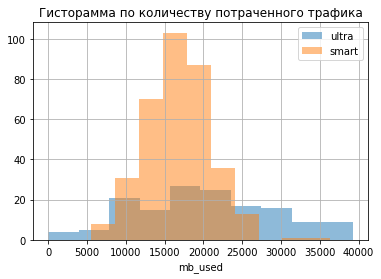

In [30]:
#построим гистограмму по количеству потраченного трафика
for tariff in ['ultra', 'smart']:
    medians[medians['tariff']==tariff ]['mb_used'].hist(alpha=0.5)
    plt.legend(['ultra', 'smart'])
    plt.title('Гисторамма по количеству потраченного трафика')
    plt.xlabel('mb_used')

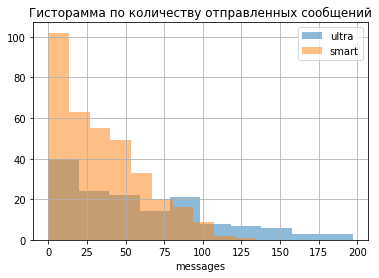

In [31]:
#построим гистограмму по количеству отправленных сообщений
for tariff in ['ultra', 'smart']:
    medians[medians['tariff']==tariff ]['messages'].hist(alpha=0.5)
    plt.legend(['ultra', 'smart'])
    plt.title('Гисторамма по количеству отправленных сообщений')
    plt.xlabel('messages')

#### Для того, чтобы точнее ответить на вопрос, какой тариф приносит больше выручки, посмотрим на распределение выручки тарифов по месяцам: 

Text(0.5, 1, 'Распределение по средней выручке в месяц для тарифов')

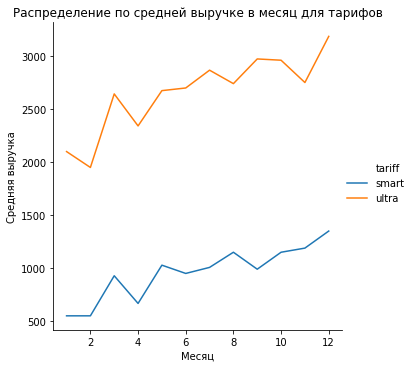

In [32]:
monthly_revenue =  united_data.pivot_table(index=['tariff','month'], 
                                           values=['revenue'], 
                                           aggfunc='median')
monthly_revenue = monthly_revenue.reset_index()
#построим распределение по средней выручке в месяц для тарифов
sns.relplot(x="month", y="revenue", hue="tariff", kind="line", data=monthly_revenue)
plt.xlabel('Месяц')
plt.ylabel('Средняя выручка')
plt.title('Распределение по средней выручке в месяц для тарифов')

#### Посмотрим, как распределяется средняя выручка по пользователям: 

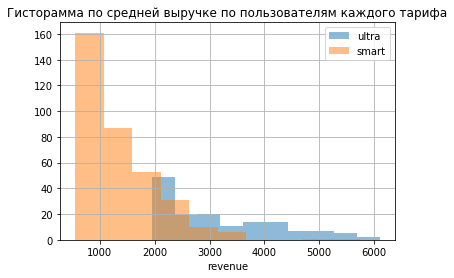

In [33]:
user_revenue = united_data.pivot_table(index=['user_id', 'tariff'], 
                                           values=['revenue'], 
                                           aggfunc='median')
user_revenue = user_revenue.reset_index()

for tariff in ['ultra', 'smart']:
    user_revenue[user_revenue['tariff']==tariff ]['revenue'].hist(alpha=0.5)
    plt.legend(['ultra', 'smart'])
    plt.title('Гисторамма по средней выручке по пользователям каждого тарифа')
    plt.xlabel('revenue')

Распределение по средней выручке по месяцам наглядно показывает, что тариф "Ультра" в среднем приносит в 2.5 раза большее денег, чем тариф "Смарт". Средняя выручка с обоих тарифов стабильно увеличивается от месяца к месяцу в течение года, кроме апреля: в этом месяце наблюдается ее снижение. 

Распределение по средней выручке пользователей показывает, что пользователям тарифа "Смарт" не хватает их тарифного плана, более того, около 10% пользователей этого в среднем тратят на связь столько же или даже больше, чем если бы они находились на более дорогом тарифе. 

#### Изучим суммарную выручку по тарифам по месяцам

Text(0.5, 1, 'Распределение по суммарной выручке в месяц для тарифов')

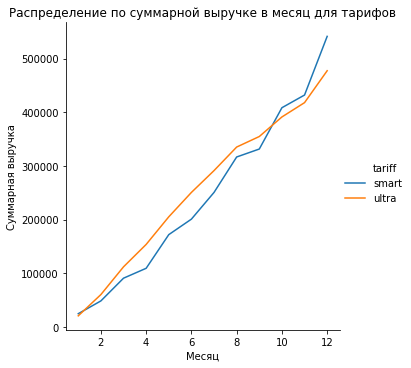

In [34]:
monthly_sum_revenue =  united_data.pivot_table(index=['tariff','month'], 
                                           values=['revenue'], 
                                           aggfunc='sum')
monthly_sum_revenue = monthly_sum_revenue.reset_index()
#построим распределение по средней выручке в месяц для тарифов
sns.relplot(x="month", y="revenue", hue="tariff", kind="line", data=monthly_sum_revenue)
plt.xlabel('Месяц')
plt.ylabel('Суммарная выручка')
plt.title('Распределение по суммарной выручке в месяц для тарифов')

#### Посмотрим, как распределяется суммарная выручка по пользователям: 

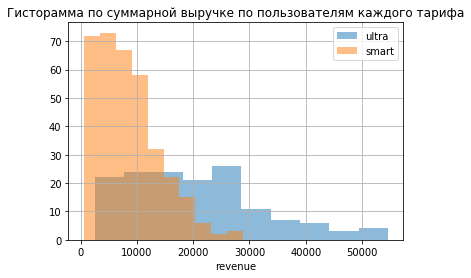

In [35]:
user_sum_revenue = united_data.pivot_table(index=['user_id', 'tariff'], 
                                           values=['revenue'], 
                                           aggfunc='sum')
user_sum_revenue = user_sum_revenue.reset_index()

for tariff in ['ultra', 'smart']:
    user_sum_revenue[user_sum_revenue['tariff']==tariff ]['revenue'].hist(alpha=0.5)
    plt.legend(['ultra', 'smart'])
    plt.title('Гисторамма по суммарной выручке по пользователям каждого тарифа')
    plt.xlabel('revenue')

В отличие от графика по распределениям средних значений, график по суммарной выручке по месяцам показавает, что 
с января по сентябрь выручка по тарифу "Ультра" немного больше, чем по тарифу "Смарт". Однако, с сентября картина меняется на противоположную. 

Что касается касается распределения по пользователям, то  он показывает, что большая часть абонентов тарифа "Смарт" тратит до 10000 тысяч за год, тогда как выручка от пользователей тарифа "Ультра" распределена более равномерно: большая их часть тратит от 3000 ло 28000 тысяч за год. 

### Вывод

По гистограммам можно сделать вывод, что пользователи тарифа «Смарт» чаще выходят за пределы тарифного плана (медиана, близкая к значениям пакетов, включенным в трафик это подтверждает), тогда как пользователи тарифа «Ультра» докупают только пакеты трафика. Эту гипотезу так же подтверждает график распределения средней выручки по пользователям. Возможно, стоит предложить пользователям тарифа «Смарт», которые  часто докупают дополнительные пакеты услуг за пределами тарифа, перейти на более дорогой тариф.

Стандартное отклонение и дисперсия по тарифу «Смарт» ниже, чем по тарифу «Ультра» по всем показателям: по длительности разговоров, по количеству потраченных мегабайт и отправленных сообщений. Возможно, это объясняется тем, что пользователи тарифа «Ультра» чувствуют себя комфортнее в рамках своего пакета. 

Кроме того, по графикам можно предположить, что суммарная выручка от обоих тарифов примерно однакова, однако тариф "Ультра" все же приносит больше денег.

###  Шаг 4. Проверка гипотез

Перед проверкой гипотез сравним дисперсии выборок, чтобы правильно установить параметр equal_var

In [36]:
smart_revenue_var = united_data[united_data['tariff'] == 'smart'].pivot_table(index='tariff', values=['revenue'], 
                                  aggfunc=np.var)
ultra_revenue_var = united_data[united_data['tariff'] == 'ultra'].pivot_table(index='tariff', values=['revenue'], 
                                  aggfunc=np.var)

In [37]:
print('Дисперсии выборок отличаются на {:.2%}'.format(1 - smart_revenue_var['revenue'][0]/ultra_revenue_var['revenue'][0]))

Дисперсии выборок отличаются на 49.54%


#### Гипотеза 1: средняя выручка пользователей тарифов «Ультра» и «Смарт» различается

𝐻0  — средняя выручка пользователей тарифа «Ультра» равна средней выручке пользователей тарифа «Смарт».

𝐻1 — средняя выручка пользователей тарифов «Ультра» и «Смарт» различаются

In [38]:
smart = united_data['revenue'][united_data['tariff'] == 'smart']

ultra = united_data['revenue'][united_data['tariff'] == 'ultra']

alpha = .05

results = st.ttest_ind(smart, ultra, equal_var = False)

print('p-значение: ', results.pvalue)

if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение:  1.1015191190306594e-266
Отвергаем нулевую гипотезу


Очевидно, что средняя выручка тарифов различается. Попробуем предположить, что выручка тарифа "Ультра" больше выручки тарифа "Смарт"

𝐻0  — средняя выручка пользователей тарифа «Ультра» равна средней выручке пользователей тарифа «Смарт».

𝐻1 — средняя выручка тарифа "Ультра" больше средней выручки тарифа "Смарт"

In [39]:
alpha = .05

results = st.ttest_ind(smart, ultra, equal_var = False)

# тест односторонний: p-value будет в два раза меньше
print('p-значение: ', results.pvalue/ 2)

# отвергаем гипотезу только если выборочное среднее значимо больше предполагаемого значения
if (results.pvalue / 2 < alpha) and (ultra.median() > smart.median()):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение:  5.507595595153297e-267
Отвергаем нулевую гипотезу


Нулевая гипотеза и тут опровергнута. Посмотрим, на сколько различаются средние выручки: 

In [40]:
united_data.pivot_table(index='tariff', values='revenue', aggfunc='median')

,revenue
tariff,
smart,1075.0
ultra,2802.0


Из таблицы выше видно, что средняя выручка тарифа "Ультра" больше средней выручки от тарифа "Смарт" примерно в 2,5 раза. 

#### Гипотеза 2: средняя выручка пользователей из Москвы отличается от выручки пользователей из других регионов

𝐻0  — средняя выручка пользователей из Москвы равна средней выручке пользователей из других регионов.

𝐻1 — средняя выручка пользователей из Москвы отличается от выручки пользователей из других регионов

In [41]:
#напишем функцию, которая будет определять регион

def region(city):
    if city == 'Москва': 
        return 'Москва'
    else: 
        return 'Другой регион'

united_data = united_data.merge(users[['user_id', 'city']], on = 'user_id')    
united_data['region'] = united_data['city'].apply(region)

Перед проверкой гипотез сравним дисперсии выборок, чтобы правильно установить параметр equal_var

In [42]:
msk_revenue_var = united_data[united_data['region'] == 'Москва'].pivot_table(index='region', values=['revenue'], 
                                  aggfunc=np.var)
reg_revenue_var = united_data[united_data['region'] != 'Москва'].pivot_table(index='region', values=['revenue'], 
                                  aggfunc=np.var)

In [43]:
print('Дисперсии выборок отличаются на {:.2%}'.format(
    1 - reg_revenue_var['revenue'][0]/msk_revenue_var['revenue'][0]))

Дисперсии выборок отличаются на 17.82%


In [44]:
moscow = united_data['revenue'][united_data['city'] == 'Москва']

regions = united_data['revenue'][united_data['city'] != 'Москва']

alpha = .05

results = st.ttest_ind(moscow, regions, equal_var = False)

print('p-значение: ', results.pvalue)

if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение:  0.0012102202252703247
Отвергаем нулевую гипотезу


Похоже, что средняя выручка Москвы и регионов различается. Попробуем предположить, что средняя выручка по Москве больше средней выручки по регионам

𝐻0 — средняя выручка пользователей из Москвы равна средней выручке пользователей из других регионов.

𝐻1 — средняя выручка пользователей из Москвы больше выручки пользователей из других регионов

In [45]:
alpha = .05

results = st.ttest_ind(moscow, regions, equal_var = False)

# тест односторонний: p-value будет в два раза меньше
print('p-значение: ', results.pvalue/ 2)

# отвергаем гипотезу только если выборочное среднее значимо больше предполагаемого значения
if (results.pvalue / 2 < alpha) and (moscow.median() > regions.median()):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение:  0.0006051101126351623
Отвергаем нулевую гипотезу


Нулевая гипотеза и тут опровергнута. Посмотрим, на сколько различаются средние выручки: 

In [46]:
united_data.pivot_table(index='region', values='revenue', aggfunc='median')

,revenue
region,
Другой регион,1632.0
Москва,1776.0


Из таблицы выше видно, что средняя выручка по Москве больше примерно на 8%

### Шаг 5. Общий вывод

Согласно результатам исследования средняя выручка от тарифа «Ультра» больше, чем от тарифа «Смарт» примерно в 2.5 раза. В среднем «Мегалайн» получает от одного пользователя тарифа «Ультра» в месяц 2802 рублей, а от одного пользователя тарифа «Смарт» - 1075 рублей. 

Что касается суммарной выручки, то с января по сентябрь больше денег приносит тариф "Ультра", а с октября по декабрь - тариф "Смарт". что большая часть абонентов тарифа "Смарт" тратит до 10000 тысяч за год, тогда как выручка от пользователей тарифа "Ультра" распределена более равномерно: большая их часть тратит от 3000 ло 28000 тысяч за год. 

При этом пользователям тарифа «Смарт» не хватает услуг в рамках тарифного пакета: кроме абонентской платы пользователи доплачивают за дополнительные пакеты услуг. Части этих клиентов можно рекомендовать переходить на тариф "Ультра"

Пользователи тарифа «Ультра», наоборот, не используют тарифный пакет в полном объеме (хотя их небольшая доля все же же докупает дополнительные Гб трафика)

Средняя выручка по Москве больше средней выручки по остальным регионам примерно на 8% (1776.0 р. в месяц в Москве против 1632.0 р. в других регионах)
